In [1]:
import tensorflow as tf
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [4]:
sess = tf.Session()

In [5]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [6]:
train_indices = np.random.choice(len(x_vals),round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

In [7]:
x_vals_train = x_vals[train_indices]
y_vals_train = y_vals[train_indices]

In [8]:
x_vals_test = x_vals[test_indices]
y_vals_test = y_vals[test_indices]

In [9]:
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

In [10]:
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [11]:
batch_size = 50
with tf.name_scope('input'):
    x_data = tf.placeholder(tf.float32, shape=[None, 3], name="x_input")
    y_target = tf.placeholder(tf.float32, shape=[None, 1], name="y_input")

In [12]:
hidden_layer_nodes = 5
with tf.name_scope('parameters'):
    W1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]), name='weights1')
    b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]), name='bias1')
    W2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]), name='weights2')
    b2 = tf.Variable(tf.random_normal(shape=[1]), name='bias2')


In [13]:
hidden_output = tf.nn.relu(tf.matmul(x_data, W1) + b1)
final_output = tf.nn.relu(tf.matmul(hidden_output, W2) + b2)

In [14]:
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [15]:
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.005).minimize(loss)

In [16]:
with tf.name_scope('evaluation'):
    correct_prediction = tf.equal(tf.argmax(y_target, 1), tf.argmax(final_output, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
sess.run(tf.global_variables_initializer())

In [18]:
logs_path = 'log/iris/1'

In [19]:
tf.summary.scalar('cost', loss)
tf.summary.scalar('accuracy', accuracy)

summary_op = tf.summary.merge_all()

In [20]:
loss_vec = []
test_loss = []

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    
    for epoch in range(500):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = x_vals_train[rand_index]
        rand_y = np.transpose([y_vals_train[rand_index]])
        _, summary = sess.run([train_step, summary_op], feed_dict={x_data : rand_x, y_target : rand_y})
        writer.add_summary(summary, epoch)
        temp_loss = sess.run(loss, feed_dict={x_data : rand_x, y_target : rand_y})
        loss_vec.append(np.sqrt(temp_loss))
        
        test_temp_loss = sess.run(loss, feed_dict={x_data : x_vals_test, y_target : np.transpose([y_vals_test])})
        test_loss.append(test_temp_loss)
        if epoch % 5 == 0: 
            print("Epoch: ", epoch)
    print("done")
    

Epoch:  0
Epoch:  5
Epoch:  10
Epoch:  15
Epoch:  20
Epoch:  25
Epoch:  30
Epoch:  35
Epoch:  40
Epoch:  45
Epoch:  50
Epoch:  55
Epoch:  60
Epoch:  65
Epoch:  70
Epoch:  75
Epoch:  80
Epoch:  85
Epoch:  90
Epoch:  95
Epoch:  100
Epoch:  105
Epoch:  110
Epoch:  115
Epoch:  120
Epoch:  125
Epoch:  130
Epoch:  135
Epoch:  140
Epoch:  145
Epoch:  150
Epoch:  155
Epoch:  160
Epoch:  165
Epoch:  170
Epoch:  175
Epoch:  180
Epoch:  185
Epoch:  190
Epoch:  195
Epoch:  200
Epoch:  205
Epoch:  210
Epoch:  215
Epoch:  220
Epoch:  225
Epoch:  230
Epoch:  235
Epoch:  240
Epoch:  245
Epoch:  250
Epoch:  255
Epoch:  260
Epoch:  265
Epoch:  270
Epoch:  275
Epoch:  280
Epoch:  285
Epoch:  290
Epoch:  295
Epoch:  300
Epoch:  305
Epoch:  310
Epoch:  315
Epoch:  320
Epoch:  325
Epoch:  330
Epoch:  335
Epoch:  340
Epoch:  345
Epoch:  350
Epoch:  355
Epoch:  360
Epoch:  365
Epoch:  370
Epoch:  375
Epoch:  380
Epoch:  385
Epoch:  390
Epoch:  395
Epoch:  400
Epoch:  405
Epoch:  410
Epoch:  415
Epoch:  420
Ep

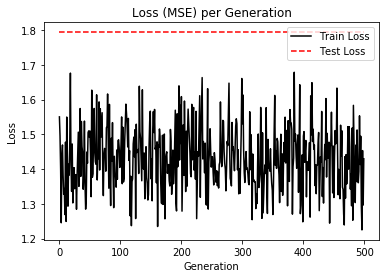

In [22]:
plt.plot(loss_vec, 'k-', label="Train Loss")
plt.plot(test_loss, 'r--', label="Test Loss")
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')